In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import HTML
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from matplotlib.colors import ListedColormap
!pip install -q plotly pandas

In [3]:
!pip install -q -U kaleido
import plotly.express as px
%matplotlib inline
sns.color_palette("PiYG")
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('C:/Users/SRAVANI/Downloads/bmi.csv')
df.head().T

,0,1,2,3,4
Gender,Male,Male,Female,Female,Male
Height,174,189,185,195,149
Weight,96,87,110,104,61
Index,4,2,4,3,3


In [5]:

df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [7]:
df.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [8]:
def prGreen(text):
    print("\033[1m{}\033[0m".format(text))
prGreen("There are duplicates" if df.duplicated().any() else "There are no duplicates.")

There are duplicates


In [9]:
print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 11


In [10]:
df.drop_duplicates(keep=False,inplace=True)

In [11]:
shape = df.shape
color_hex = "#e94196"
colored_shape_str = "\033[38;2;{};{};{}m{}x{}\033[0m".format(
    int(color_hex[1:3], 16),
    int(color_hex[3:5], 16),
    int(color_hex[5:], 16),
    shape[0],
    shape[1]
)
print("DataFrame shape:", colored_shape_str)

DataFrame shape: 478x4


In [12]:
df['Index'].value_counts()

5    192
4    126
2     69
3     60
1     18
0     13
Name: Index, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

# instanciar encoder
lb = LabelEncoder()

objList = df.select_dtypes(include = "object").columns

for obj in objList:
    df[obj] = lb.fit_transform(df[obj].astype(str))

In [14]:
df

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
4,1,149,61,3
5,1,189,104,3
...,...,...,...,...
495,0,150,153,5
496,0,184,121,4
497,0,141,136,5
498,1,150,95,5


In [15]:
fig = px.scatter(
    df,
    x='Height',
    y='Weight',
    color='Index',
    title='Height vs Weight with Index',
    labels={'Height': 'Height (cm)', 'Weight': 'Weight (kg)'},
    category_orders={'Index': ['0', '1', '2', '3', '4', '5']},
    hover_name='Index',
    hover_data={'Height': True, 'Weight': True},)

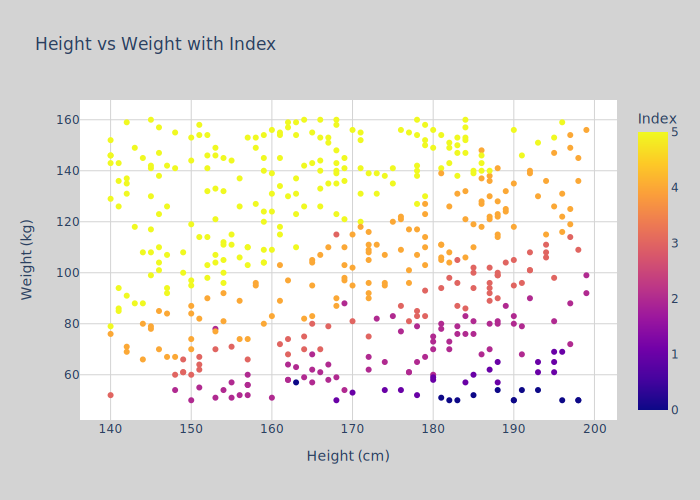

In [16]:
fig.update_layout(
    showlegend=True,
    legend_title_text='Index',
    xaxis=dict(gridcolor='lightgray'),
    yaxis=dict(gridcolor='lightgray'),
    paper_bgcolor='lightgray',
    plot_bgcolor='white',
)

fig.show(renderer="svg")

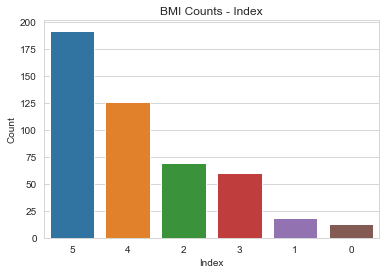

In [17]:
plt.figure()
sns.countplot(x='Index', data=df, order=df['Index'].value_counts().index)
plt.title('BMI Counts - Index')
plt.xlabel('Index')
plt.ylabel('Count')
plt.show()

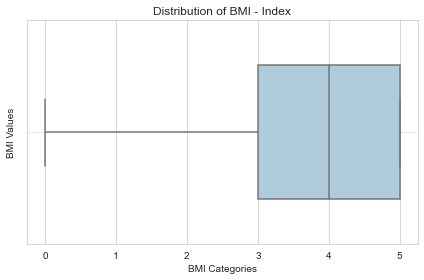

In [18]:
plt.figure()
colors = sns.color_palette('Paired')
# Create the box plot
sns.boxplot(x='Index', data=df, palette=colors, width=0.6)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Distribution of BMI - Index')
plt.xlabel('BMI Categories')
plt.ylabel('BMI Values')
plt.tight_layout()
plt.show()

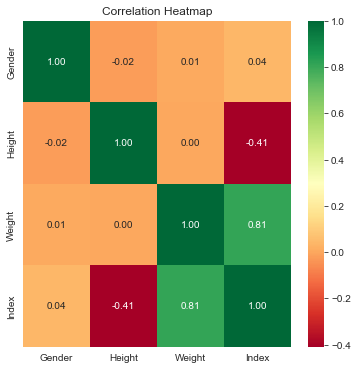

In [19]:
df_corr = df.corr()
f, ax = plt.subplots(figsize=(6, 6))

sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 10}, ax=ax)
plt.title('Correlation Heatmap')
plt.show()

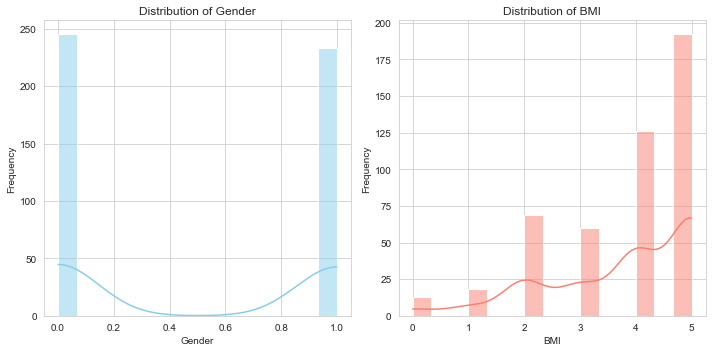

In [20]:
plt.figure(figsize=(10, 5))

# Create a side-by-side histogram for Gender and BMI
plt.subplot(1, 2, 1)
sns.histplot(df['Gender'], bins=15, color='skyblue', kde=True)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Index'], bins=15, color='salmon', kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

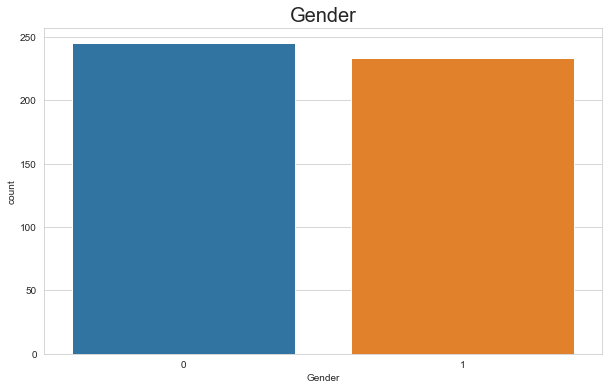

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x=df["Gender"], palette="tab10")
plt.title('Gender', fontsize = 20)
plt.xticks(fontsize = 10) 
plt.show()

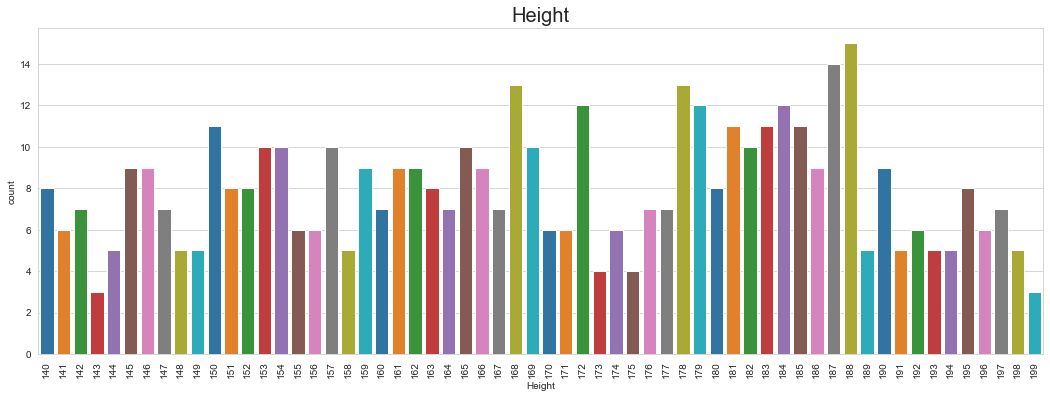

In [22]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.countplot(x=df["Height"], palette="tab10")
plt.title('Height', fontsize = 20)
plt.xticks(fontsize = 10, rotation=90) 
plt.show()

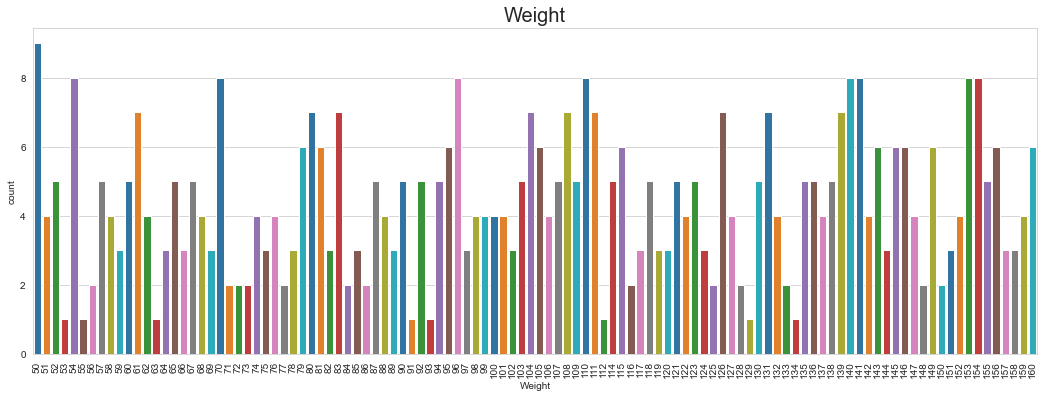

In [23]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.countplot(x=df["Weight"], palette="tab10")
plt.title('Weight', fontsize = 20)
plt.xticks(fontsize = 10, rotation=90) 
plt.show()

In [24]:
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
4,1,149,61,3
5,1,189,104,3


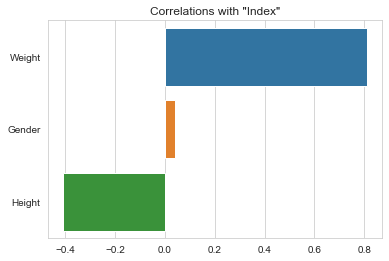

In [25]:
limit = -1.0

data = df.corr()["Index"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "Index"')
plt.show()

In [26]:
X = df.drop('Index',axis=1).values
y = df['Index'].values

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [28]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

n_values = list(range(1, 30))
accuracies = []

for n in n_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_sub, y_train_sub)
    y_pred_val = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    accuracies.append(accuracy)

In [29]:
best_n = n_values[np.argmax(accuracies)]
colored_text = f'<span style="color: #e94196; font-weight: bold;">Best value of n: {best_n}</span>'
display(HTML(colored_text))

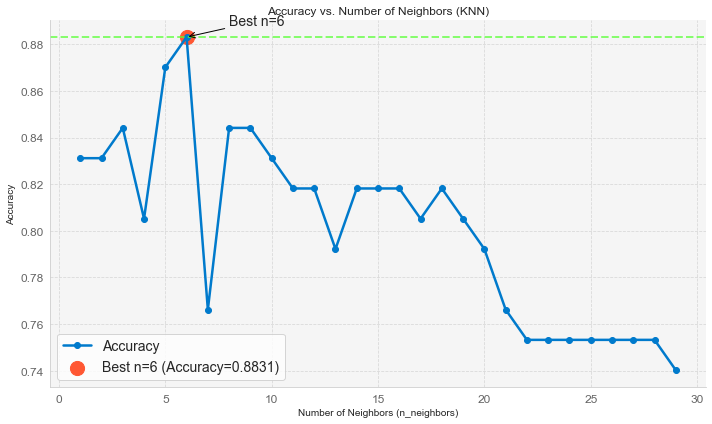

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(n_values, accuracies, marker='o', linestyle='-', color='#007ACC', label='Accuracy', linewidth=2.5)
plt.title('Accuracy vs. Number of Neighbors (KNN)')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.scatter(best_n, max(accuracies), color='#FF5733', marker='o', s=200, label=f'Best n={best_n} (Accuracy={max(accuracies):.4f})')
plt.legend(loc='best', fontsize=14)
plt.axhline(max(accuracies), color='#57FF33', linestyle='--', linewidth=2, label=f'Best Accuracy ({max(accuracies):.4f})', alpha=0.7)
plt.annotate(f'Best n={best_n}', xy=(best_n, max(accuracies)), xytext=(best_n + 2, max(accuracies) + 0.005), fontsize=14,
             arrowprops=dict(arrowstyle='->', color='black'))
plt.gca().set_facecolor('#f5f5f5')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=12, color='#666666')
plt.yticks(fontsize=12, color='#666666')
plt.tight_layout()
plt.show()

In [33]:
knn_best = KNeighborsClassifier(n_neighbors=best_n)

# Train the classifier on the entire training set
knn_best.fit(X_train, y_train)

# Predict on the test set
y_pred_test = knn_best.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)

colored_text = f'<span style="color: #e94196; font-weight: bold;">Accuracy on test set with n =</span> {best_n} : {test_accuracy}'
display(HTML(colored_text))

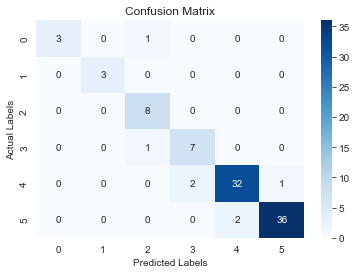

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Create a heatmap for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [35]:
prGreen(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         3
           2       0.80      1.00      0.89         8
           3       0.78      0.88      0.82         8
           4       0.94      0.91      0.93        35
           5       0.97      0.95      0.96        38

    accuracy                           0.93        96
   macro avg       0.92      0.91      0.91        96
weighted avg       0.93      0.93      0.93        96

